In [44]:
import jax.numpy as jnp
import e3nn_jax
import matplotlib.pyplot as plt
from e3signals import radial
import torch

In [45]:
n_radials = 5
r_cut = 6.
cos_radials = radial.FixedCosineRadialModel(r_cut, n_radials, 0.)

In [46]:
x = torch.linspace(0., 6., 100)
y = cos_radials(x)

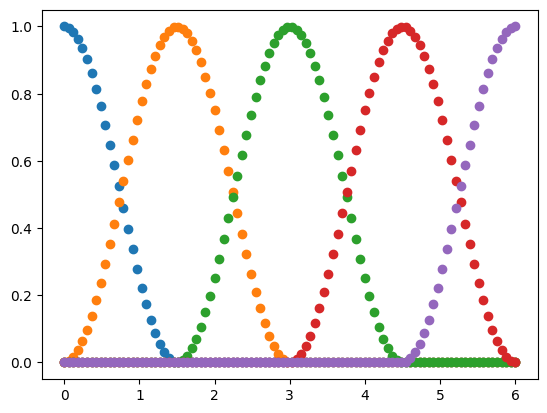

In [47]:
for r in range(n_radials):
    plt.scatter(x, y[:, r])

In [48]:
jx = jnp.linspace(0., 6., 100)
jy = e3nn_jax.soft_one_hot_linspace(jx, start=0., end=6., number=n_radials, basis="smooth_finite", cutoff=False)

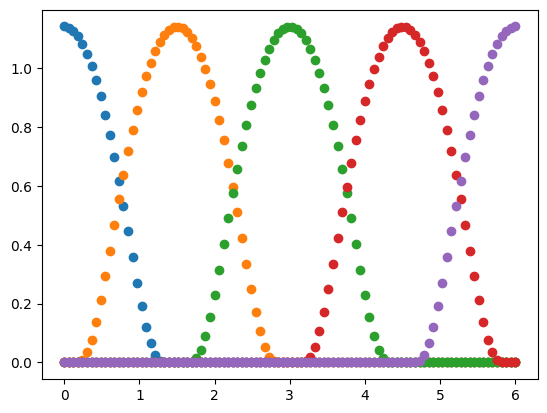

In [49]:
for r in range(n_radials):
    plt.scatter(jx, jy[:, r])

In [50]:
n_radials = 5
poly_radial = radial.SmoothPolynomials(n_radials, 6.)

In [51]:
py = poly_radial(x)

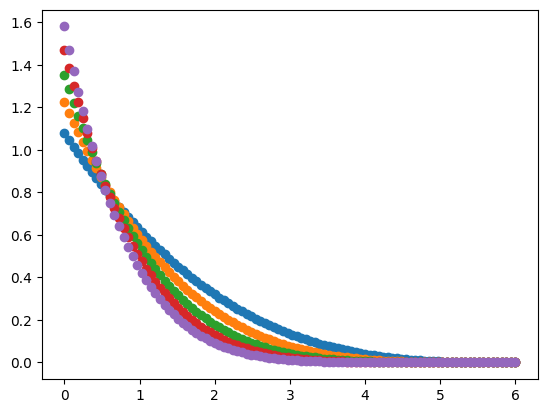

In [52]:
for r in range(n_radials):
    plt.scatter(x, py[:, r])

In [53]:
cos_radials2 = radial.CosineFunctions(r_cut, n_radials)
ycos = cos_radials2(x)

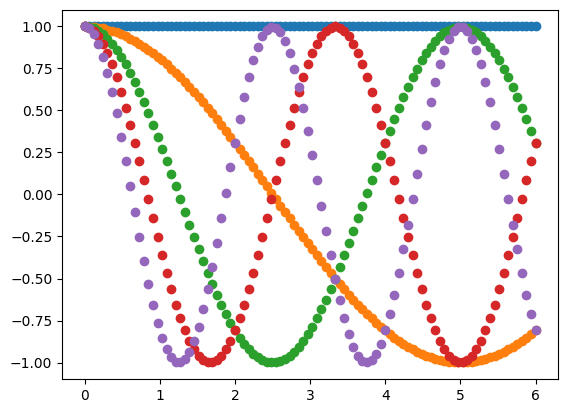

In [54]:
for r in range(n_radials):
    plt.scatter(x, ycos[:, r])

In [55]:
cos_model_smoothed = radial.FadeAtCutoff(cos_radials2, r_cut)
ycos_smooth = cos_model_smoothed(x)

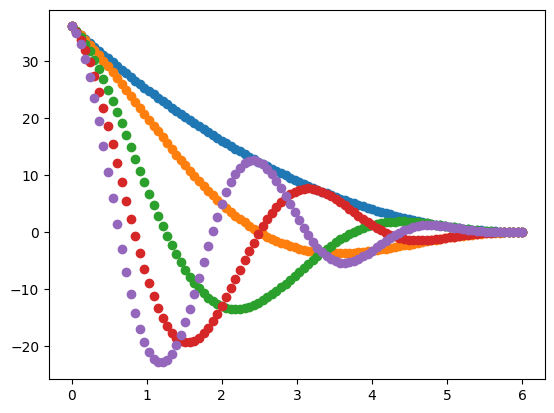

In [56]:
for r in range(n_radials):
    plt.scatter(x, ycos_smooth[:, r])

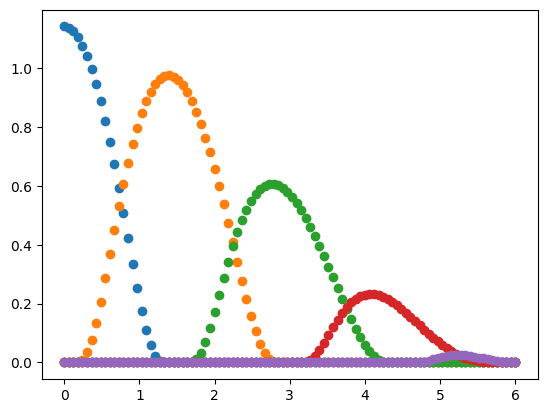

In [65]:
smoothing = e3nn_jax.poly_envelope(1, 1, r_cut)
for r in range(n_radials):
    plt.scatter(x, smoothing(jx) * jy[:, r])

In [61]:
jy_smooth.shape

(100,)

In [70]:
env = e3nn_jax.poly_envelope(2, 2, 1.)

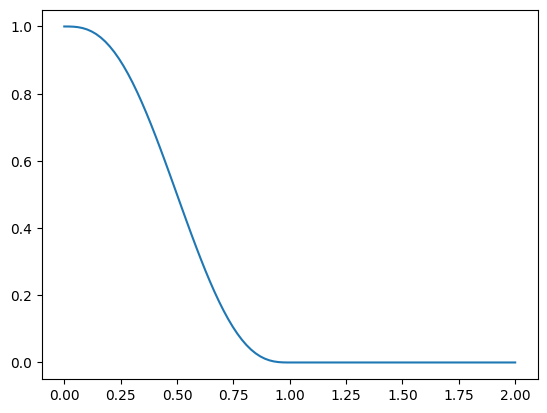

In [73]:
x = jnp.linspace(0, 2., 100)
plt.plot(x, env(x))